Forecasting

In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



Data Preparation (tidy)

In [2]:
gdppc <- global_economy|>mutate(GDP_per_capita= GDP/Population)

Plot the data(visualize)

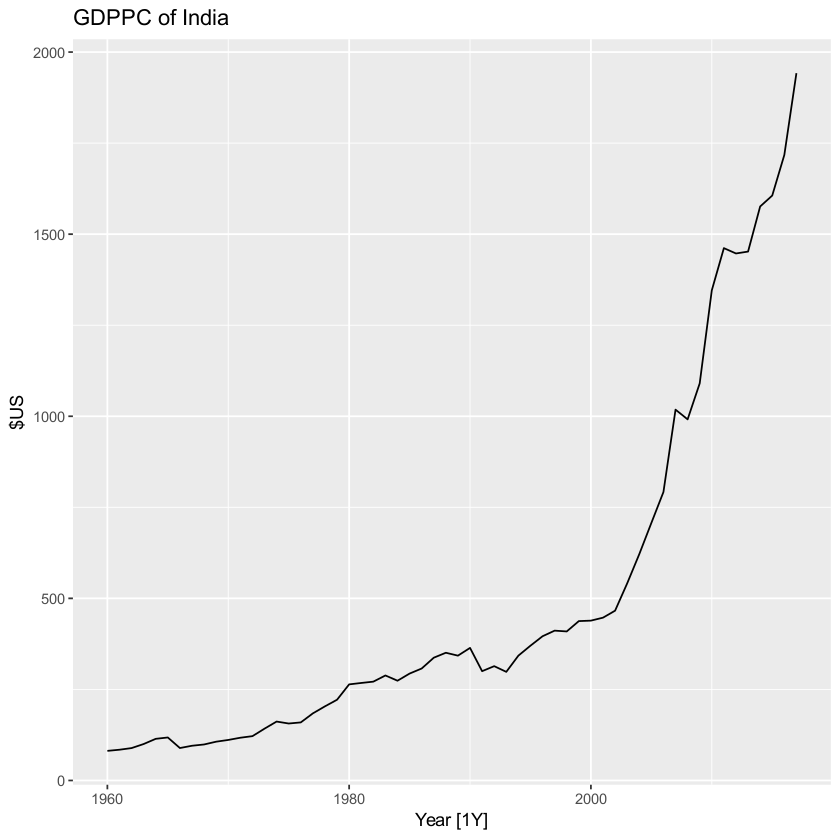

In [3]:
gdppc|>filter(Country=="India")|>autoplot(GDP_per_capita)+labs(y="$US", title="GDPPC of India")

Defina a model(specify)

In [4]:
library(fable)

In [5]:
?fable

fable                package:fabletools                R Documentation

_C_r_e_a_t_e _a _f_a_b_l_e _o_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     A fable (forecast table) data class (‘fbl_ts’) which is a
     tsibble-like data structure for representing forecasts. In
     extension to the key and index from the tsibble (‘tbl_ts’) class,
     a fable (‘fbl_ts’) must also contain a single distribution column
     that uses values from the distributional package.

_U_s_a_g_e:

     fable(..., response, distribution)
     
_A_r_g_u_m_e_n_t_s:

     ...: Arguments passed to ‘tsibble::tsibble()’.

response: The character vector of response variable(s).

distribution: The name of the distribution column (can be provided
          using a bare expression).


In [ ]:
# We forecast using models/ fable library includes models which can be used using the formula (y~x) interface.

TS

Train the model

In [6]:
# Once an appropriate model is specified, we next train the model on some data. One or more model specifications can be estimated using the model() function


fit <- gdppc|> model(trend_model = TSLM(GDP_per_capita ~ trend()))

Warning message:
“7 errors (1 unique) encountered for trend_model
[7] 0 (non-NA) cases
”


In [7]:
# This fits a linear trend modeol to the GDP per capita data for each combination of key variable in the tsibble. In this example, it will fit a model to each of the 263 countries in the dataset. The resulting object is amodel table or a "mable"
fit

Country,trend_model
<fct>,<model>
Afghanistan,<TSLM>
Albania,<TSLM>
Algeria,<TSLM>
American Samoa,<TSLM>
Andorra,<TSLM>
Angola,<TSLM>
Antigua and Barbuda,<TSLM>
Arab World,<TSLM>
Argentina,<TSLM>


In [ ]:
# Each row correspoinds to one combination of the key variables. The trend_model column conatains information about the fitted model for each coutnry. In later chapters we will learn how to see more information aboukt each model

Check model performance(evaluate)

In [8]:
# this will be discussed in the sections of 5.8 and 5.9

Produce forecasts(forecast)

In [9]:
# Once a model has been fitted, it is important to check how ell it has performed on the data. There are several diagnostic tools available to chekck model behaviour, and also accuracy measures that allow one model to be compared against another. 



Produce forecasts(forecast)

In [ ]:
fit|> forecast(h="7 years")

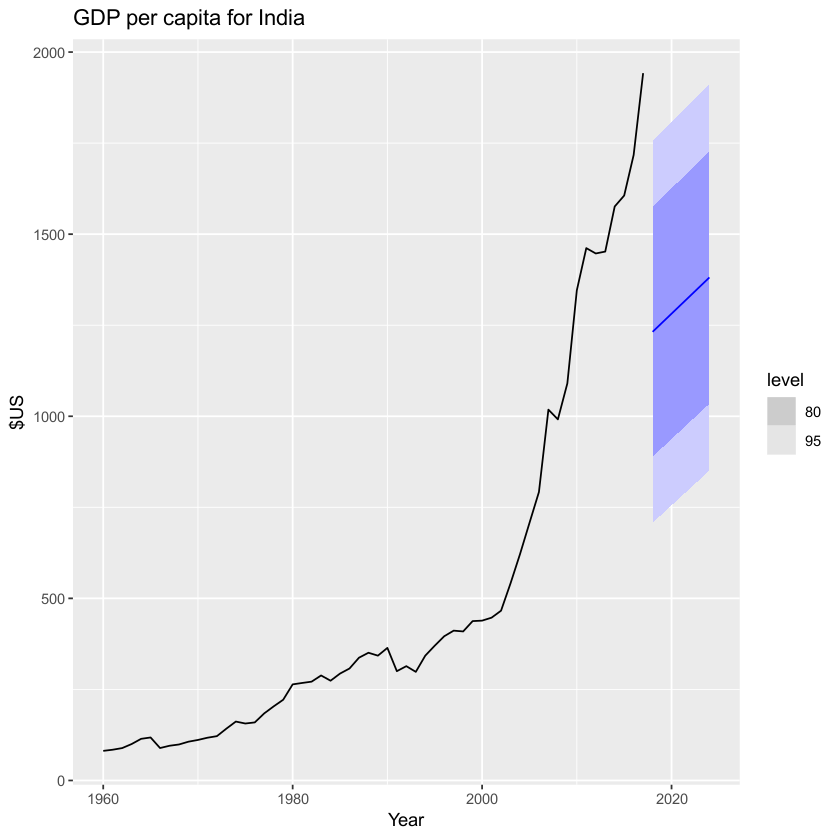

In [15]:
# This is a forecast table or fable. Each row correspinds to one forecast period for each coutnry. The GDP_per_capita column contains the forecast distribution while the .mean column contains the point forecast. The point forecast is the mean of the forecast distribution



# The forecastst can be plotted along with the historical data using autoplot() as follows


fit|>
forecast(h=7)|>
filter(Country == "India")|>
autoplot(gdppc)+
labs(y="$US", title="GDP per capita for India")

5.2 Some simple forecasting methods

In [17]:
bricks <- aus_production |> filter_index("1970 Q1"~"2004 Q4") |> select(Bricks)
# The filter_index() function is a vonvenienet shorthand for extracting a section of a time

In [19]:
tail(bricks)

Bricks,Quarter
<dbl>,<qtr>
440,2003 Q3
413,2003 Q4
409,2004 Q1
423,2004 Q2
428,2004 Q3
397,2004 Q4


Mean method

In [ ]:
# Here the forecasts of all futurre values are equal to the average of the historical dta.

In [23]:
bricks|> model(MEAN(Bricks))

MEAN(Bricks)
<model>
<MEAN>


Naive method

In [29]:
# For naive forecasts, we simply set all forecasts to be the value of the last observation

bricks |> model(NAIVE(Bricks))|>pull()

<lst_mdl[1]>
[1] <NAIVE>

Snaive


In [30]:
bricks |> model(SNAIVE(Bricks ~ lag("year")))

"SNAIVE(Bricks ~ lag(""year""))"
<model>
<SNAIVE>


In [31]:
bricks |> model(RW(Bricks ~ drift()))

RW(Bricks ~ drift())
<model>
<RW w/ drift>


Example: Australian quarterly beeer production

In [32]:
# set trainign data fro 1992 to 2006

train<- aus_production |> filter_index("1992 Q1"~"2006 Q4")


In [34]:
# Fit the models

beer_fit <- train|> model(mean = MEAN(Beer), `Naive`=NAIVE(Beer), `Seasonal naive`=SNAIVE(Beer))

Plot variable not specified, automatically selected `.vars = Beer`


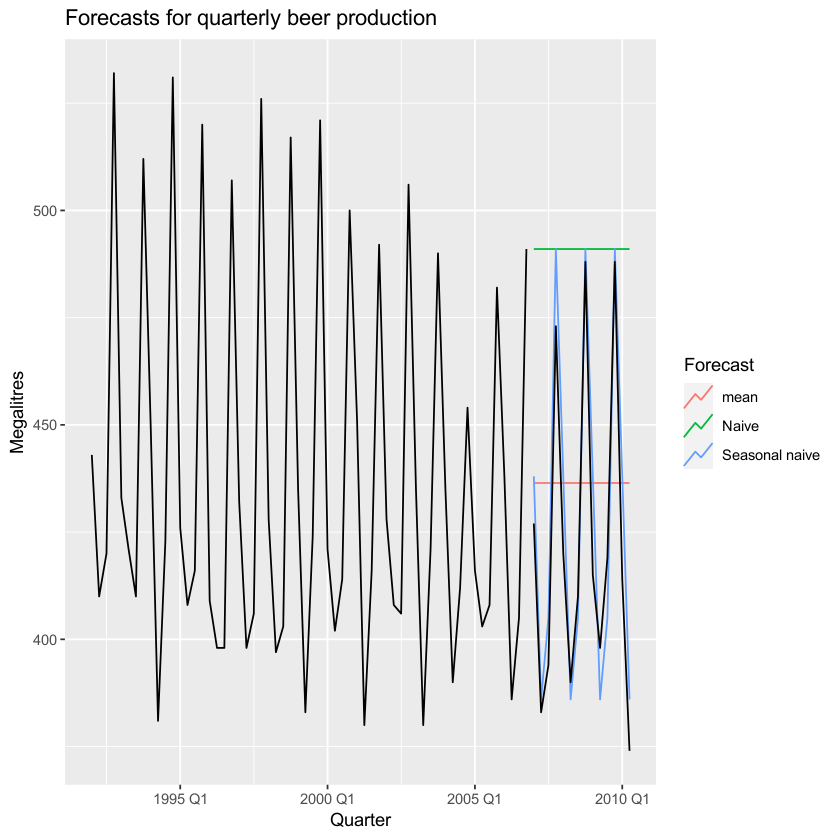

In [36]:
# Generate forecasts for 14 quarters

beer_fc <- beer_fit|> forecast(h=14)


# plot forecasts against actual values

beer_fc |> autoplot(train, level = NULL)+autolayer(filter_index(aus_production, "2007 Q1" ~.),
colour = "black") + labs(y = "Megalitres", title="Forecasts for quarterly beer production") +
guides(colour = guide_legend(title = "Forecast"))

In [37]:
# In  the above case, only the seasonal naive forecasts are close to the observed values from 2007 onwards

Example: Google's daily closing stock price

In [44]:
# the non-seasonal methods are applied to Google daily closing stock price in 2015 and used to forecast one month ahead. Because stock prices are not observed every day, we first set up a new time index based onthe trading days rather than calender days.

# Re-index based on trading days

google_stock <- gafa_stock|> filter(Symbol=="GOOG", year(Date)>=2007)|>
mutate(day = row_number())|>update_tsibble(index = day, regular=T)

In [45]:
head(google_stock)

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume,day
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GOOG,2014-01-02,554.1259,555.2636,550.5492,552.9635,552.9635,3666400,1
GOOG,2014-01-03,553.8975,554.8562,548.8950,548.9297,548.9297,3355000,2
GOOG,2014-01-06,552.9089,555.8149,549.6451,555.0499,555.0499,3561600,3
GOOG,2014-01-07,558.8651,566.1627,556.9575,565.7504,565.7504,5138400,4
GOOG,2014-01-08,569.2972,569.9530,562.9833,566.9277,566.9277,4514100,5
GOOG,2014-01-09,568.0255,568.4130,559.1433,561.4682,561.4682,4196000,6


In [46]:
#Now filter the year of interest

google_2014 <- google_stock|>filter(year(Date)==2014)


In [47]:
# Fit the models

google_fit <- google_2014|> model(Mean = MEAN(Close),`Naive`=NAIVE(Close), Drift=NAIVE(Close~drift()))

In [48]:
# produce forecasts for the trading days in january 2016

google_jan_2016 <- google_stock|> filter(yearmonth(Date) == yearmonth("2016 Jan"))

google_fc <- google_fit|>forecast(new_data = google_jan_2016)

In [49]:
google_jan_2016

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume,day
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GOOG,2016-01-04,743.00,744.060,731.258,741.84,741.84,3272800,505
GOOG,2016-01-05,746.45,752.000,738.640,742.58,742.58,1950700,506
GOOG,2016-01-06,730.00,747.180,728.920,743.62,743.62,1947000,507
GOOG,2016-01-07,730.31,738.500,719.060,726.39,726.39,2963700,508
GOOG,2016-01-08,731.45,733.230,713.000,714.47,714.47,2450900,509
GOOG,2016-01-11,716.61,718.855,703.540,716.03,716.03,2089300,510
GOOG,2016-01-12,721.68,728.750,717.317,726.07,726.07,2024500,511
GOOG,2016-01-13,730.85,734.740,698.610,700.56,700.56,2501700,512
GOOG,2016-01-14,705.38,721.925,689.100,714.72,714.72,2225800,513


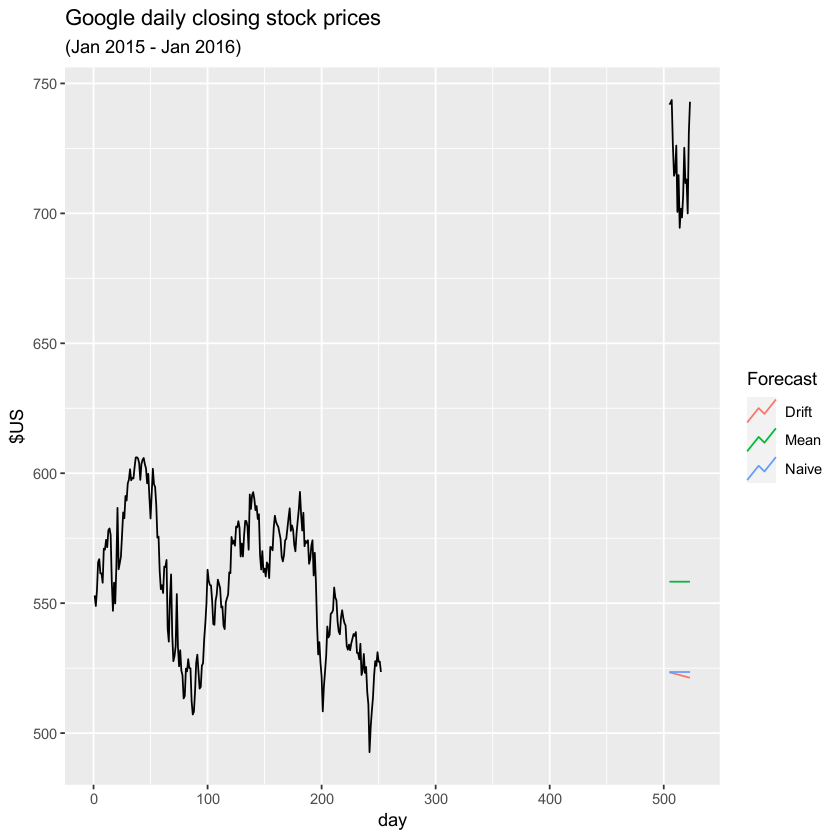

In [50]:
# Plot the forecasts

google_fc |> autoplot(google_2014, level=NULL)+
autolayer(google_jan_2016, Close, colour="black")+
labs(y = "$US", title="Google daily closing stock prices", subtitle="(Jan 2015 - Jan 2016)") + guides(colour = guide_legend(title="Forecast"))

In [ ]:
# Sometimes one of these simple mehthods will be the best forecasting method available, but in many cases these mehtods will serve as benchmarks rather than the method of choice. That is any forecasting methods we develop will be compared to these simple mehtods to ensure that the new mehtod is better than thse simple alternative. If not the new mwthod is not worth considering

In [ ]:
# yt = c
# where c is the average computed over all available observations, including those at times after t. Similarly for the drift mehtod, the drift  parameter is estimated using all available observations. In this case the fitted values are given by 

# yt = yt-1 + c

# In both cases, there is a parameter to be estimated frokm the data. The "hat" above the c reminds us that this is an estimate. When the estimate of c involves observations after time t, the fitted values are not true forecasts. On the other hand, naive or seasonal naive forecasts do not involve nay parameters, and so fitted values are true forecasts in such cases..



# Residuals

# residuals et = yreal - ypred


# If a transformation has been used in the model, then it is often useful to look at residuals on the tranformed scale. We calll these innovation residuals. For example, suppose wel modellled the logarithms of the data wt = log(yt). Then the innovaiton residuals are given by 




# The fitted values and residuals fromk a model an be obtained using the augment(). funciton. In the beer producation example in Se